# Ejercicio: Data input, output e iteración

En esta primera parte, aprenderemos a:

* Descargar ficheros y renombrarlos por comandos de Linux (mucho más eficiente que recurrir a librerías de Python). Esta será una práctica a la que nos iremos habituando a lo largo del curso.
* Leer y escribir ficheros en formato `csv` con la librería `pandas`.
* Iterar sobre las filas de un objeto `pd.DataFrame`.

En lo relativo a la primera parte, para la descarga emplearemos el comando `wget` seguido de la URL en cuestión. Para la segunda parte, usaremos la estructura `mv <source>  <destination>`:

```bash
# Descargamos un fichero csv
!wget https://www.stats.govt.nz/assets/Uploads/Gross-domestic-product/Gross-domestic-product-December-2021-quarter/Download-data/gross-domestic-product-December-2021-quarter-csv.csv
# Lo renombramos para que sea más sencillo acceder a él
!mv /content/gross-domestic-product-December-2021-quarter-csv.csv /content/dataset.csv
```

Cuando trabajamos en notebooks, es más cómodo guardar la URL como un enlace, y posteriormente la librería `pandas` se encarga por nosotros de importarlo:

In [1]:
# Descargamos un fichero csv
URL_data='https://www.stats.govt.nz/assets/Uploads/Gross-domestic-product/Gross-domestic-product-December-2021-quarter/Download-data/gross-domestic-product-December-2021-quarter-csv.csv'

Seguidamente, procedemos a leerlo:

In [2]:
# Librerías
import os
import pandas as pd
# Leemos archivo
df = pd.read_csv(URL_data)

Es conveniente hacer uso de la librería `os`, ya que a bajo nivel nos gestiona cuál es nuestro directorio activo actual (`os.getcwd()`) y nos permite fácilmente concatenar rutas para encontrar archivos (`os.path.join()`).

Veamos ahora cómo realizar iteraciones. En `pandas` existen esencialmente dos métodos para ello:

* `iterrows`: Enlace a [documentación](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iterrows.html).
* `itertuples`: Enlace a [documentación](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.itertuples.html).

Tu objetivo será analizar la documentación e implementar un bucle donde se itere sobre las filas del `DataFrame` dejando un sencillo `pass` dentro del bucle, con el decorador `%%timeit` para evaluar qué método es más rápido. A continuación se muestra un ejemplo:

```python
%%timeit
for elem in [1,2,3,4,5]:
    pass
```

* Método iterrows:

In [ ]:
%%timeit


1 loop, best of 5: 3.28 s per loop


*Tipo de respuesta esperada:*

```python
1 loop, best of 5: 3.28 s per loop
```

* Método `itertuples` por defecto:

In [ ]:
%%timeit


1 loop, best of 5: 117 ms per loop


*Tipo de respuesta esperada:*

```python
1 loop, best of 5: 117 ms per loop
```

* Método `itertuples` sin contener los índices:

In [ ]:
%%timeit


*Tipo de respuesta esperada:*

```python
10 loops, best of 5: 118 ms per loop
```

# Ejercicio Ecommerce

En este ejercicio, se proporcionan datos ficticios sobre compras realizadas por Amazon, por lo que es posible que exista alguna incoherencia en los datos. Se trata de ir realizando cada uno de los ejercicios propuestos progresivamente. Hay más de una forma de hacerlos, y todos se pueden responder con una línea.

El enlace es:

```python
URL_data = 'https://raw.githubusercontent.com/MatinMasimli/DataScience_ML_Udemy_Exercises/master/Ecommerce_purchases/Ecommerce%20Purchases.csv'
```

Cargamos la librería pandas como 'pd' y numpy como 'np':

In [2]:
import pandas as pd
import numpy as np


Ahora, leemos el DataFrame y mostramos sus cinco primeras filas:

In [7]:
URL_data = 'https://raw.githubusercontent.com/MatinMasimli/DataScience_ML_Udemy_Exercises/master/Ecommerce_purchases/Ecommerce%20Purchases.csv'
df = pd.read_csv(URL_data)
df.to_csv('./data/Data_Ecommerce.csv', index=False)

df.head(1)


,Address,Lot,AM or PM,Browser Info,Company,Credit Card,CC Exp Date,CC Security Code,CC Provider,Email,Job,IP Address,Language,Purchase Price
0,"16629 Pace Camp Apt. 448\nAlexisborough, NE 77...",46 in,PM,Opera/9.56.(X11; Linux x86_64; sl-SI) Presto/2...,Martinez-Herman,6011929061123406,02/20,900,JCB 16 digit,pdunlap@yahoo.com,"Scientist, product/process development",149.146.147.205,el,98.14


Tambien se puede asi

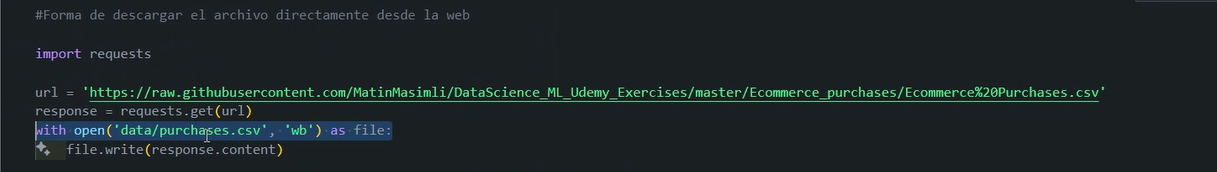

¿Qué dimensiones tienen nuestros datos?

In [9]:
df.shape

(10000, 14)

*Respuesta esperada:*

```python
(10000,14)
```

#### COMPROBAR SI HAY DATOS NULOS

In [10]:
df.isnull().sum()

Address             0
Lot                 0
AM or PM            0
Browser Info        0
Company             0
Credit Card         0
CC Exp Date         0
CC Security Code    0
CC Provider         0
Email               0
Job                 0
IP Address          0
Language            0
Purchase Price      0
dtype: int64

#### COMPROBAR DUPLICADOS

In [12]:
df.duplicated().sum()

np.int64(0)

¿Cuál es el precio medio de compra?

In [8]:
df['Purchase Price'].mean()

np.float64(50.347302)

*Respuesta esperada:*

```python
50.34730200000025
```

Cuáles fueron, respectivamente, los precios mayores y menores de compra?

In [16]:
df['Purchase Price'].max()

np.float64(99.99)

*Respuesta esperada:*

```python
99.989999999999995
```

In [17]:
df['Purchase Price'].min()


np.float64(0.0)

*Respuesta esperada:*

```python
0.0
```

¿Cuánta gente tiene indicado como inglés (valor 'en') el idioma preferente?

In [8]:
df['Language'][df['Language'] == 'en'].count()

np.int64(1098)

*Respuesta esperada:*

```python
1098
```

¿Cuánta gente dispone del título profesional `'Lawyer'`?


In [11]:
df['Job'][df['Job'] == 'Lawyer'].count()

np.int64(30)

*Respuesta esperada:*

```python
30
```

¿Cuántas personas hicieron compras durante la mañana, y cuántas durante la tarde?

*(Pista: Use [value_counts()](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html))*

In [14]:
df['AM or PM'].value_counts()

AM or PM
PM    5068
AM    4932
Name: count, dtype: int64

*Respuesta esperada:*

```python
PM    5068
AM    4932
Name: AM or PM, dtype: int64
```

¿Cuáles son las cinco profesiones más habituales?

In [16]:
df['Job'].value_counts().head()

Job
Interior and spatial designer        31
Lawyer                               30
Social researcher                    28
Research officer, political party    27
Designer, jewellery                  27
Name: count, dtype: int64

*Respuesta esperada:*

```python
Interior and spatial designer    31
Lawyer                           30
Social researcher                28
Purchasing manager               27
Designer, jewellery              27
Name: Job, dtype: int64
```

Algún usuario hizo una compra que vino en el lote `90 WT`. ¿Cuál fue el precio de esa transacción?

In [18]:
df['Purchase Price'][df['Lot'] == '90 WT']

513    75.1
Name: Purchase Price, dtype: float64

*Respuesta esperada:*

```python
513    75.1
Name: Purchase Price, dtype: float64
```

¿Cuál es el email de la persona con tarjeta de crédito `4926535242672853`?

In [21]:
df['Email'][df['Credit Card'] == 4926535242672853]

1234    bondellen@williams-garza.com
Name: Email, dtype: object

*Respuesta esperada:*

```python
1234    bondellen@williams-garza.com
Name: Email, dtype: object
```

¿Cuánta gente tiene `American Express` como proveedor de crédito e hizo una compra superior a `$95`?

In [29]:
df['CC Provider'][(df['CC Provider'] == 'American Express') & (df['Purchase Price'] > 95)].count()

np.int64(39)

*Respuesta esperada:*

```python
39
```

¿Cuánta gente tiene una tarjeta de crédito que expira en 2025?

In [41]:
len([x[-2:] for x in df['CC Exp Date'] if x[-2:] == '25'])

1033

*Respuesta esperada:*

```python
1033
```

¿Cuáles fueron los cinco *email hosts* más populares (e.g., gmail, yahoo,...)?

In [6]:
pd.Series([x.split('@')[-1] for x in df['Email']]).value_counts()[:5]

hotmail.com     1638
yahoo.com       1616
gmail.com       1605
smith.com         42
williams.com      37
Name: count, dtype: int64

*Respuesta esperada:*

```python
hotmail.com     1638
yahoo.com       1616
gmail.com       1605
smith.com         42
williams.com      37
Name: Email, dtype: int64
```